## Two-Dimensional Lattice Models

We now extend the tight-binding formalism to two spatial dimensions.  
In two dimensions the Brillouin zone is parametrised by crystal momentum  
$\mathbf{k} = (k_x,k_y)$ and has the topology of a torus $T^2$, since both
$k_x$ and $k_y$ are periodic.

We first construct simple lattice Hamiltonians before moving to the 
two-band topological form relevant for Chern insulators.
We also briefly cover 3D examples
---

### 1) Square Lattice

Consider a square Bravais lattice with lattice constant $a$.  
The lattice vectors are

$$
\mathbf{R}_{mn} = m a \hat{i} + n a \hat{j}.
$$

Restricting to nearest-neighbour hopping with amplitude $t$ and ignoring lattice site energies, the tight-binding Hamiltonian is

$$
H = -t \sum_{\langle i,j \rangle}
\left(
\ket{i}\bra{j} + \ket{j}\bra{i}
\right),
$$

where $\langle i,j \rangle$ denotes nearest neighbours.

Using Bloch states

$$
\ket{\psi_{\mathbf{k}}}
=
\frac{1}{\sqrt{N}}
\sum_{\mathbf{R}}
e^{i\mathbf{k}\cdot\mathbf{R}}
\ket{\mathbf{R}},
$$

the Hamiltonian diagonalises to give the dispersion

$$
E(\mathbf{k})
=
-2t\left(
\cos(k_x a) + \cos(k_y a)
\right).
$$

This model contains a single band and is topologically trivial; its Berry curvature vanishes due to time-reversal and inversion symmetry.

---





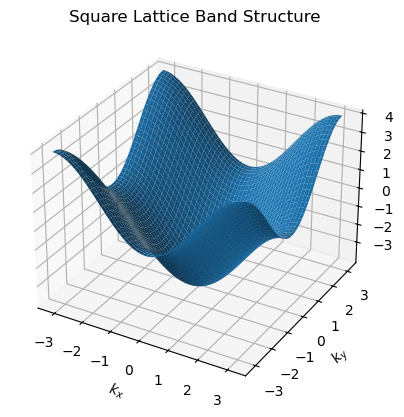

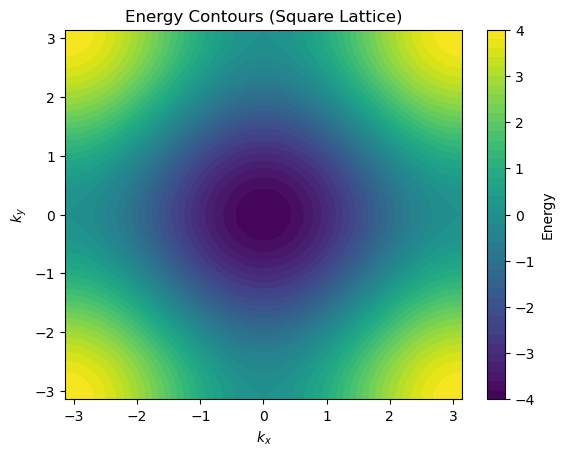

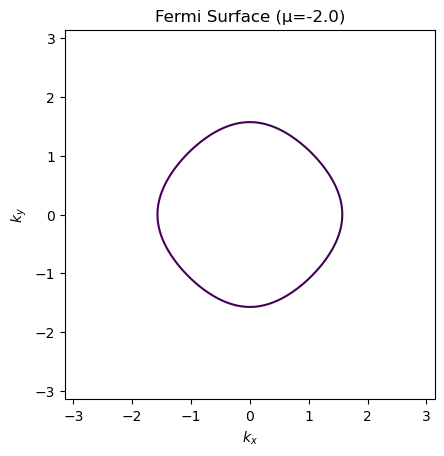

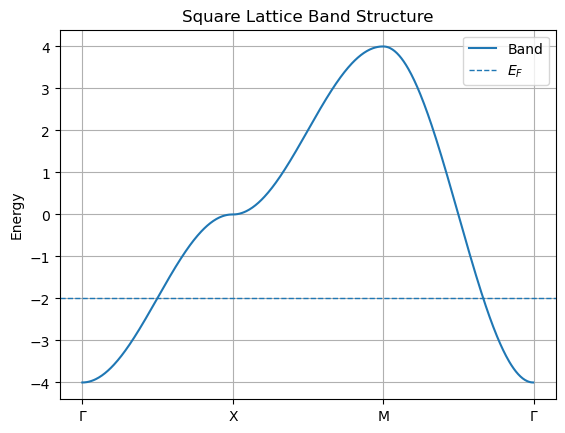

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def square_dispersion(kx, ky, t=1):
    return -2*t*(np.cos(kx) + np.cos(ky))


def plot_square_band(Nk=200):

    k = np.linspace(-np.pi, np.pi, Nk)
    KX, KY = np.meshgrid(k, k)
    E = square_dispersion(KX, KY)

    # 3D surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(KX, KY, E)
    ax.set_xlabel("$k_x$")
    ax.set_ylabel("$k_y$")
    ax.set_zlabel("Energy")
    ax.set_title("Square Lattice Band Structure")
    plt.show()

    # 2D contour
    plt.contourf(KX, KY, E, levels=50)
    plt.colorbar(label="Energy")
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.title("Energy Contours (Square Lattice)")
    plt.show()

def plot_fermi_surface_square(mu=0.0, Nk=400):

    k = np.linspace(-np.pi, np.pi, Nk)
    KX, KY = np.meshgrid(k, k)
    E = square_dispersion(KX, KY)

    plt.contour(KX, KY, E, levels=[mu])
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.title(f"Fermi Surface (μ={mu})")
    plt.gca().set_aspect('equal')
    plt.show()

def square_band_path(Nk=200, mu=0.0):

    Gamma = np.array([0, 0])
    X = np.array([np.pi, 0])
    M = np.array([np.pi, np.pi])

    nodes = [Gamma, X, M, Gamma]
    labels = [r"$\Gamma$", "X", "M", r"$\Gamma$"]

    path = []

    for i in range(len(nodes)-1):
        for s in np.linspace(0, 1, Nk):
            k = nodes[i] + s*(nodes[i+1] - nodes[i])
            path.append(k)

    path = np.array(path)

    energies = [square_dispersion(k[0], k[1]) for k in path]

    plt.plot(energies, label="Band")
    
    # Fermi level
    plt.axhline(mu, linestyle="--", linewidth=1, label=r"$E_F$")

    plt.xticks([0, Nk, 2*Nk, 3*Nk], labels)
    plt.ylabel("Energy")
    plt.title("Square Lattice Band Structure")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_square_band(Nk=200) #200 sites
plot_fermi_surface_square(mu=-2.0, Nk=400) #set fermi surface at mu=1
square_band_path(Nk=200, mu=-2.0)

### 2) Honeycomb (Hexagonal) Lattice

The honeycomb lattice consists of two sublattices $A$ and $B$, implying two orbitals per unit cell.  
The Bloch Hamiltonian is therefore a $2 \times 2$ matrix.

With nearest-neighbour hopping amplitude $t$:

$$
H(\mathbf{k}) =
\begin{pmatrix}
0 & f(\mathbf{k}) \\
f^*(\mathbf{k}) & 0
\end{pmatrix},
$$

where

$$
f(\mathbf{k}) =
t \sum_{j=1}^{3}
e^{i\mathbf{k}\cdot\boldsymbol{\delta}_j}.
$$

The band energies are

$$
E_\pm(\mathbf{k}) = \pm |f(\mathbf{k})|.
$$

This model exhibits Dirac points but remains topologically trivial unless additional symmetry-breaking terms are introduced. This lattice is physically realised by graphene.

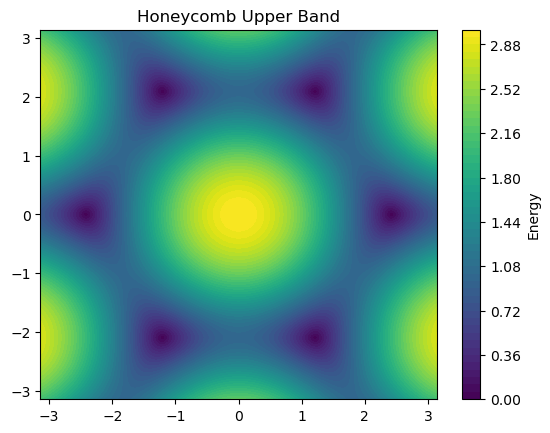

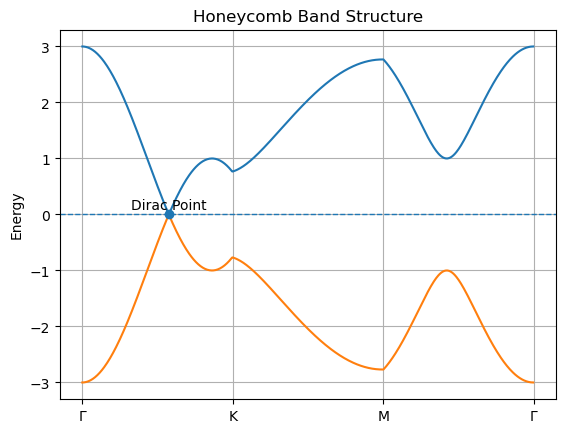

In [29]:
def f_graphene(kx, ky, t=1):
    #f for hexagonal lattice hamiltonian (see above)
    a = 1
    delta = [
        np.array([0, a]),
        np.array([np.sqrt(3)/2*a, -a/2]),
        np.array([-np.sqrt(3)/2*a, -a/2])
    ]

    total = 0
    for d in delta:
        total += np.exp(1j*(kx*d[0] + ky*d[1]))

    return t * total

def honeycomb_bands(kx, ky):
    f = f_graphene(kx, ky)
    return np.abs(f), -np.abs(f)

def hexagonal_bz_mask(KX, KY):

    # Inequalities defining hexagon
    return ((np.abs(KX) <= 4*np.pi/3) & (np.abs(np.sqrt(3)*KY + KX) <= 4*np.pi/3) & (np.abs(np.sqrt(3)*KY - KX) <= 4*np.pi/3))

def plot_honeycomb_band(Nk=200):

    k = np.linspace(-np.pi, np.pi, Nk)
    KX, KY = np.meshgrid(k, k)

    E_plus = np.zeros_like(KX)
    E_minus = np.zeros_like(KX)

    for i in range(Nk):
        for j in range(Nk):
            E_plus[i,j], E_minus[i,j] = honeycomb_bands(KX[i,j], KY[i,j])

    plt.contourf(KX, KY, E_plus, levels=50)
    plt.colorbar(label="Energy")
    plt.title("Honeycomb Upper Band")
    plt.show()
def honeycomb_band_path(Nk=200, mu=0.0):

    Gamma = np.array([0, 0])
    K = np.array([4*np.pi/3, 0])
    M = np.array([np.pi, np.pi/np.sqrt(3)])

    nodes = [Gamma, K, M, Gamma]
    labels = [r"$\Gamma$", "K", "M", r"$\Gamma$"]

    path = [] #define path for honeycomb band structure plot
    for i in range(len(nodes)-1):
        for s in np.linspace(0, 1, Nk):
            k = nodes[i] + s*(nodes[i+1] - nodes[i])
            path.append(k)

    path = np.array(path)

    E_plus = []
    E_minus = []

    for kx, ky in path:
        e1, e2 = honeycomb_bands(kx, ky)
        E_plus.append(e1)
        E_minus.append(e2)

    plt.plot(E_plus)
    plt.plot(E_minus)
    plt.axhline(mu, linestyle="--", linewidth=1, label=r"$E_F$") #fermi level
    
    #dirac point (roughly assuming it always occurs at minimum gap)
    E_plus = np.array(E_plus)   # convert lists to arrays
    E_minus = np.array(E_minus)
    gap = np.abs(E_plus - E_minus)  # now this works element-wise
    dirac_index = np.argmin(gap)
    plt.scatter(dirac_index, E_plus[dirac_index], zorder=5)
    plt.text(dirac_index, 0.1, "Dirac Point", ha="center")

    plt.xticks(
        [0, Nk, 2*Nk, 3*Nk],
        labels)
    
    plt.ylabel("Energy")
    plt.title("Honeycomb Band Structure")
    plt.grid(True)
    plt.show()

plot_honeycomb_band(Nk=200)
honeycomb_band_path(Nk=200) 

### 3) General Two-Band Hamiltonians

Motivated by the honeycomb structure, consider the general two-band Hamiltonian

$$
H(\mathbf{k}) =
\mathbf{d}(\mathbf{k}) \cdot \boldsymbol{\sigma}
=
d_x(\mathbf{k})\sigma_x
+
d_y(\mathbf{k})\sigma_y
+
d_z(\mathbf{k})\sigma_z.
$$

The eigenvalues are

$$
E_\pm(\mathbf{k}) = \pm |\mathbf{d}(\mathbf{k})|.
$$

For a gapped system ($|\mathbf{d}(\mathbf{k})| \neq 0$ everywhere), the unit vector

$$
\hat{\mathbf{d}}(\mathbf{k}) =
\frac{\mathbf{d}(\mathbf{k})}{|\mathbf{d}(\mathbf{k})|}
$$

defines a smooth mapping

$$
T^2 \longrightarrow S^2,
$$

from the Brillouin zone torus to the Bloch sphere.

Such mappings are classified by the **Chern number**, obtained by integrating the Berry curvature over the Brillouin zone.

## Topological Phases in Two Dimensions ##

In one dimension, the SSH model is characterised by a winding number arising from a mapping 
$S^1 \to S^1$, where the Brillouin zone is a circle and the Hamiltonian lies in a plane.

In two dimensions, the Brillouin zone becomes a torus $T^2$, parametrised by crystal momenta $(k_x,k_y)$. 
For two-band models of the form
\begin{equation}
H(\mathbf{k}) = \mathbf{d}(\mathbf{k}) \cdot \boldsymbol{\sigma},
\end{equation}
the unit vector
\begin{equation}
\hat{\mathbf{d}}(\mathbf{k}) = \frac{\mathbf{d}(\mathbf{k})}{|\mathbf{d}(\mathbf{k})|}
\end{equation}
defines a mapping
\begin{equation}
T^2 \longrightarrow S^2
\end{equation}
and lives on the Bloch sphere.
Such mappings are classified by an integer topological invariant known as the Chern number, obtained by integrating the Berry curvature over the Brillouin zone.


m = -3, Chern ≈ 0.0000
m = -1, Chern ≈ -1.0000
m = 1, Chern ≈ 1.0000
m = 3, Chern ≈ 0.0000


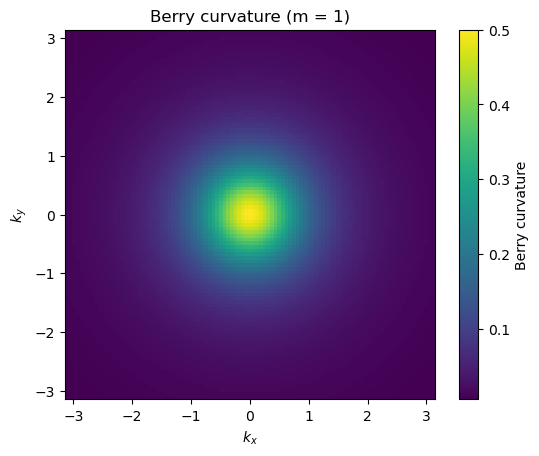

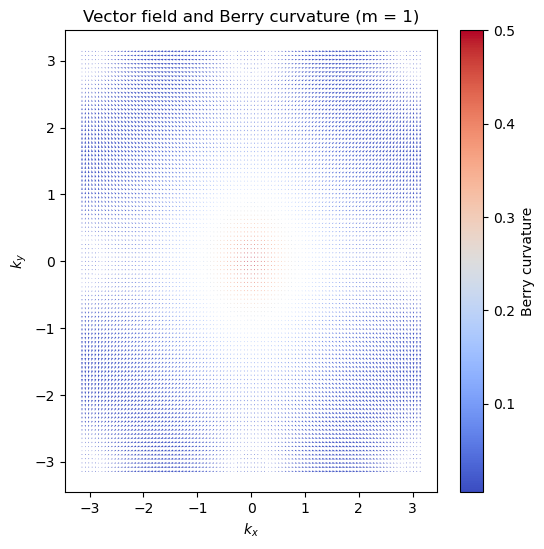

In [33]:
# d-vector for the Qi–Wu–Zhang model,
# H(k) = sin(kx).σx + sin(ky).σy + (m + cos(kx) + cos(ky)).σz; this defines a mapping from the Brillouin zone (T^2) to the Bloch sphere (S^2).
def d_vector_QWZ(kx, ky, m):
    dx = np.sin(kx)                        # x-component
    dy = np.sin(ky)                        # y-component
    dz = m + np.cos(kx) + np.cos(ky)       # mass + lattice term
    return np.array([dx, dy, dz])

def d_vector(dx,dy,dz):
    return np.array([dx, dy, dz])

# Berry curvature for a two-band model, computing derivatives w/standard fdm:
def berry_curvature(kx, ky, m, dk=1e-5):

    # Compute normalised d-vector (unit vector on Bloch sphere)
    d = d_vector(kx, ky, m)
    d_hat = d / np.linalg.norm(d)

    # Finite-difference derivatives of d-vector
    d_kx = (d_vector(kx + dk, ky, m) - d_vector(kx - dk, ky, m)) / (2 * dk)
    d_ky = (d_vector(kx, ky + dk, m) - d_vector(kx, ky - dk, m)) / (2 * dk)

    # Convert derivatives to derivatives of the unit vector
    d_kx_hat = d_kx / np.linalg.norm(d)
    d_ky_hat = d_ky / np.linalg.norm(d)

    # Berry curvature formula
    return 0.5 * np.dot(d_hat, np.cross(d_kx_hat, d_ky_hat))


#compute chern number numerically by integrating Berry curvature (approximate the integral by summing over discrete grid):
# QWZ Hamiltonian matrix
def H_qwz(kx, ky, m):
    dx = np.sin(kx)
    dy = np.sin(ky)
    dz = m + np.cos(kx) + np.cos(ky)

    return np.array([[dz, dx - 1j*dy],[dx + 1j*dy, -dz]]) #rewriting Hamiltonian in terms of the d vector and pauli matrices


#cmpute chern no using lattice gauge method:
def compute_chern_lattice(m, Nk=41):

    k_vals = np.linspace(-np.pi, np.pi, Nk, endpoint=False)
    dk = 2*np.pi / Nk

    # Store eigenvectors of lower band
    eigenvectors = np.zeros((Nk, Nk, 2), dtype=complex)

    for i, kx in enumerate(k_vals):
        for j, ky in enumerate(k_vals):

            H = H_qwz(kx, ky, m)
            eigvals, eigvecs = np.linalg.eigh(H)

            # lower band eigenvector
            eigenvectors[i, j] = eigvecs[:, 0]

    total = 0.0 + 0.0j

    for i in range(Nk):
        for j in range(Nk):

            ip = (i + 1) % Nk
            jp = (j + 1) % Nk

            u = eigenvectors[i, j]
            ux = eigenvectors[ip, j]
            uy = eigenvectors[i, jp]
            uxy = eigenvectors[ip, jp]

            # Link variables
            Ux = np.vdot(u, ux)
            Uy = np.vdot(u, uy)
            Ux_y = np.vdot(uy, uxy)
            Uy_x = np.vdot(ux, uxy)

            # Normalise to unit modulus
            Ux /= np.abs(Ux)
            Uy /= np.abs(Uy)
            Ux_y /= np.abs(Ux_y)
            Uy_x /= np.abs(Uy_x)

            # Lattice field strength
            F = np.log(Ux * Uy_x / (Ux_y * Uy))

            total += F

    return (total / (2j*np.pi)).real
for m in [-3, -1, 1, 3]:
    print(f"m = {m}, Chern ≈ {compute_chern_lattice(m):.4f}")


#visualise Berry curvature over Brillouin zone:
def plot_berry(m, Nk=101):

    kx_vals = np.linspace(-np.pi, np.pi, Nk)
    ky_vals = np.linspace(-np.pi, np.pi, Nk)

    B = np.zeros((Nk, Nk))

    # Fill Berry curvature grid
    for i, kx in enumerate(kx_vals):
        for j, ky in enumerate(ky_vals):
            B[i, j] = berry_curvature(kx, ky, m)

    # Plot as heatmap
    plt.imshow(
        B,
        extent=[-np.pi, np.pi, -np.pi, np.pi],
        origin='lower'
    )

    plt.colorbar(label="Berry curvature")
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.title(f"Berry curvature (m = {m})")
    plt.show()
def plot_berry_vector(m, Nk=20): #enhance plot by doing it as a vector field
    kx_vals = np.linspace(-np.pi, np.pi, Nk)
    ky_vals = np.linspace(-np.pi, np.pi, Nk)
    KX, KY = np.meshgrid(kx_vals, ky_vals)

    DX, DY, B = np.zeros_like(KX), np.zeros_like(KY), np.zeros_like(KX)

    for i in range(Nk):
        for j in range(Nk):
            kx, ky = KX[i,j], KY[i,j]
            d = d_vector_QWZ(kx, ky, m)
            d_hat = d / np.linalg.norm(d)
            # XY components for in-plane vector field
            DX[i,j] = d_hat[0]
            DY[i,j] = d_hat[1]
            B[i,j] = berry_curvature(kx, ky, m)

    plt.figure(figsize=(6,6))
    plt.quiver(KX, KY, DX, DY, B, cmap='coolwarm')
    plt.colorbar(label="Berry curvature")
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.title(f"Vector field and Berry curvature (m = {m})")
    plt.show()

plot_berry(m=1, Nk=101)
plot_berry_vector(1,101)

# Example: Qi–Wu–Zhang (QWZ) Model

The **Qi–Wu–Zhang (QWZ) model** is a simple 2D **Chern insulator**, capturing the essential physics of topological phases in two dimensions. Its Hamiltonian is:

$$
H(\mathbf{k}) = \sin k_x \, \sigma_x + \sin k_y \, \sigma_y + (m + \cos k_x + \cos k_y) \, \sigma_z
$$

where $\mathbf{k} = (k_x, k_y)$ is the crystal momentum in the **Brillouin zone**, $\sigma_i$ are the Pauli matrices, and $m$ is a **mass parameter** controlling the topological phase.

---

## Band Structure

The eigenvalues of the Hamiltonian are:

$$
E_\pm(\mathbf{k}) = \pm |\mathbf{d}(\mathbf{k})| = \pm \sqrt{\sin^2 k_x + \sin^2 k_y + (m + \cos k_x + \cos k_y)^2 }
$$

The system is **gapped** as long as $E_\pm(\mathbf{k}) \neq 0$.

---

## Topological Phases

The QWZ model exhibits distinct topological phases depending on $m$:

| Mass $m$        | Chern number $C$ |
|-----------------|-----------------|
| $m < -2$        | 0               |
| $-2 < m < 0$    | +1              |
| $0 < m < 2$     | -1              |
| $m > 2$         | 0               |

The **Chern number** $C$ is the integral of the **Berry curvature** over the Brillouin zone:

$$
C = \frac{1}{2\pi} \int_{\text{BZ}} \Omega_{xy}(\mathbf{k}) \, d^2k
$$

where $\Omega_{xy}(\mathbf{k})$ is the Berry curvature of the occupied band.

---

## Berry Curvature

The Berry curvature can be computed from the normalized **d-vector**:

$$
\hat{\mathbf{d}}(\mathbf{k}) = \frac{\mathbf{d}(\mathbf{k})}{|\mathbf{d}(\mathbf{k})|}
$$

with

$$
\mathbf{d}(\mathbf{k}) = (\sin k_x, \sin k_y, m + \cos k_x + \cos k_y)
$$

and

$$
\Omega_{xy}(\mathbf{k}) = \frac{1}{2} \, \hat{\mathbf{d}} \cdot \left( \frac{\partial \hat{\mathbf{d}}}{\partial k_x} \times \frac{\partial \hat{\mathbf{d}}}{\partial k_y} \right)
$$

The Berry curvature tends to **concentrate near Dirac points** in the Brillouin zone and changes sign depending on the topological phase.

---

## Visualizing the Topology

1. *Berry Curvature Heatmap*: Shows where the curvature is concentrated in $k$-space.  
3. *Animation with varying $m$*: Visualizing how curvature and Bloch sphere wrapping evolve as the system undergoes topological phase transitions.

---

C:\Users\x44401ap\AppData\Local\Temp\ipykernel_20260\3263088234.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\x44401ap\AppData\Local\Temp\ipykernel_20260\3263088234.py:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


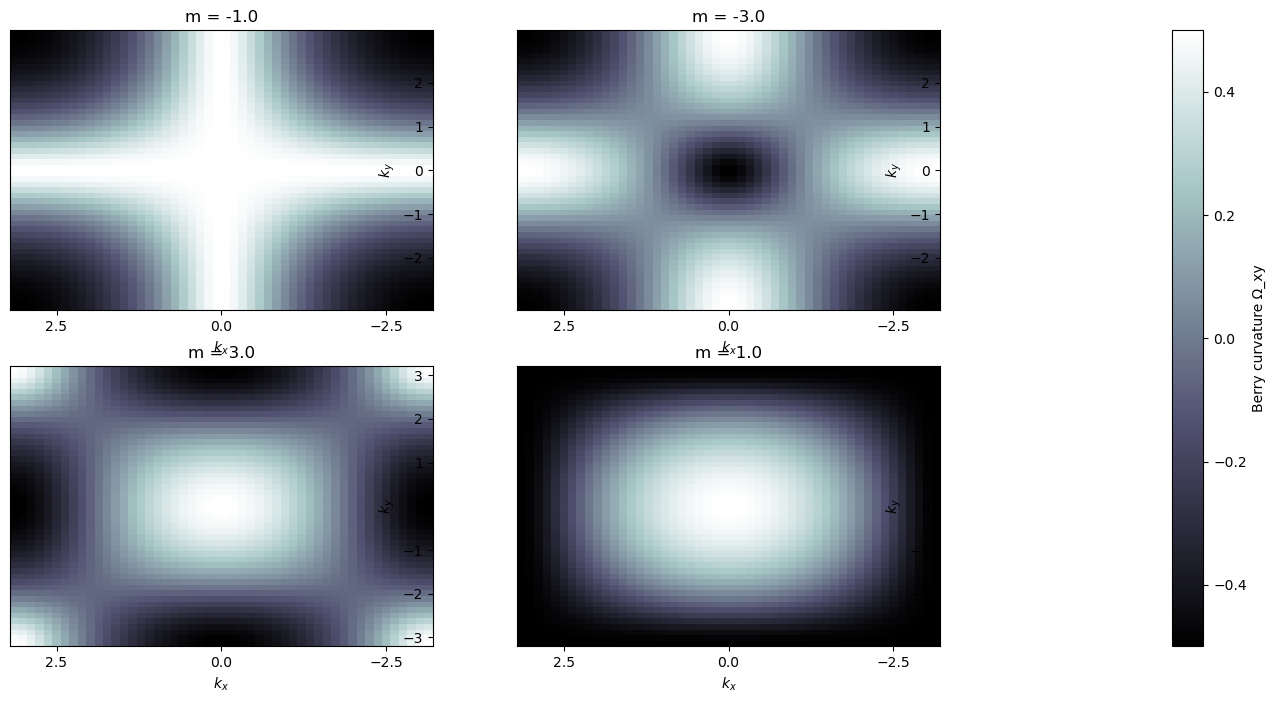

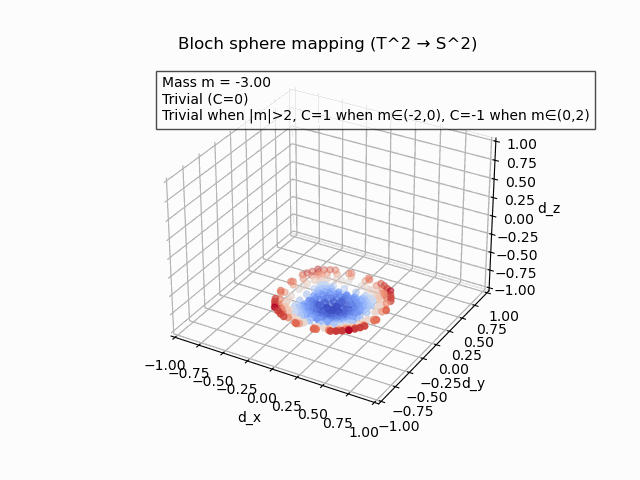

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image


def d_vector_QWZ(kx, ky, m):
    dx = np.sin(kx)
    dy = np.sin(ky)
    dz = m + np.cos(kx) + np.cos(ky)
    return np.array([dx, dy, dz])

def berry_curvature(kx, ky, m, dk=1e-5):
    d = d_vector_QWZ(kx, ky, m)
    d_hat = d / np.linalg.norm(d)
    
    # finite differences
    d_kx = (d_vector_QWZ(kx+dk, ky, m) - d_vector_QWZ(kx-dk, ky, m)) / (2*dk)
    d_ky = (d_vector_QWZ(kx, ky+dk, m) - d_vector_QWZ(kx, ky-dk, m)) / (2*dk)
    
    return 0.5 * np.dot(d_hat, np.cross(d_kx, d_ky))

# Parameters
Nk = 50
kx_vals = np.linspace(-np.pi, np.pi, Nk)
ky_vals = np.linspace(-np.pi, np.pi, Nk)
KX, KY = np.meshgrid(kx_vals, ky_vals)
m = 1.0

# Compute Berry curvature on the grid
Omega = np.zeros((Nk, Nk))
for i in range(Nk):
    for j in range(Nk):
        Omega[j, i] = berry_curvature(KX[j,i], KY[j,i], m, dk=1e-4)

# Example m
m_values = [-3.0, -1.0, 1.0, 3.0]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid
axes = axes.flatten()  # flatten to iterate easily

for i, m_val in enumerate(m_values):
    # Compute Omega for this m
    Omega = np.zeros((Nk, Nk))
    for j in range(Nk):
        for k in range(Nk):
            Omega[j, k] = berry_curvature(KX[j,k], KY[j,k], m_val, dk=1e-4)
    
    im = axes[i].pcolormesh(KX, KY, Omega, shading='auto', cmap='bone')
    axes[i].set_title(f'm = {m_val}')
    axes[i].set_xlabel('$k_x$')
    axes[i].set_ylabel('$k_y$')

# Add a single colorbar for all subplots
fig.colorbar(im, ax=axes, orientation='vertical', label='Berry curvature Ω_xy', fraction=0.7, pad=1.5)

plt.tight_layout()
plt.show()


#Bloch sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

kx_vals = np.linspace(-np.pi, np.pi, 20)
ky_vals = np.linspace(-np.pi, np.pi, 20)

def d_vector_QWZ(kx, ky, m):
    # Example QWZ d-vector
    return np.array([np.sin(kx), np.sin(ky), m + np.cos(kx) + np.cos(ky)])

def update_bloch(frame):
    ax.cla()
    m = -3 + 6*frame/50
    X, Y, Z = [], [], []
    
    for kx in kx_vals:
        for ky in ky_vals:
            d_hat = np.array(d_vector_QWZ(kx, ky, m))
            d_hat /= np.linalg.norm(d_hat)
            X.append(d_hat[0])
            Y.append(d_hat[1])
            Z.append(d_hat[2])
    
    ax.scatter(X, Y, Z, c=Z, cmap='coolwarm', s=20)
    ax.set_xlim([-1,1]); ax.set_ylim([-1,1]); ax.set_zlim([-1,1])
    ax.set_xlabel('d_x'); ax.set_ylabel('d_y'); ax.set_zlabel('d_z')
    
    # Determine topological phase
    if m <= -2 or m >= 2:
        phase = "Trivial (C=0)"
    elif -2 < m < 0:
        phase = "C=+1"
    else:
        phase = "C=-1"
    
    ax.text2D(0.05, 0.95,
              f"Mass m = {m:.2f}\n{phase}\nTrivial when |m|>2, C=1 when m∈(-2,0), C=-1 when m∈(0,2)",
              transform=ax.transAxes,
              fontsize=10, color='black', va='top', ha='left',
              bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
    
    ax.set_title("Bloch sphere mapping (T^2 → S^2)")
    return ax,

ani_bloch = FuncAnimation(fig, update_bloch, frames=50, blit=False)
ani_bloch.save('QWZ_Bloch_sphere_annotated.gif', writer=PillowWriter(fps=8))
plt.close(fig)
Image(filename='QWZ_Bloch_sphere_annotated.gif')

# 2D SSH Model

The **2D SSH model** is a natural extension of the 1D SSH model to a square lattice with alternating intra- and inter-cell hopping amplitudes. It is a simple model for a **2D topological insulator** with a two-band Bloch Hamiltonian.

---

## Hamiltonian

The 2D SSH Hamiltonian in momentum space is:

$$
H(\mathbf{k}) =
\begin{pmatrix}
0 & h(\mathbf{k}) \\
h^*(\mathbf{k}) & 0
\end{pmatrix},
\quad
h(\mathbf{k}) = t_x + t_x' e^{-i k_x} + t_y + t_y' e^{-i k_y}
$$

where:

- $\mathbf{k} = (k_x, k_y)$ is the crystal momentum,
- $(t_x, t_y)$ are intra-cell hopping amplitudes,
- $(t_x', t_y')$ are inter-cell hopping amplitudes,
- $(H(\mathbf{k}))$ acts on a two-site sublattice basis.

The eigenvalues are:

$$
E_\pm(\mathbf{k}) = \pm |h(\mathbf{k})|
$$
---

## Topological Properties

- In analogy with the 1D SSH model, the topology is determined by the **winding of $h(\mathbf{k})$** around the origin in the complex plane.
- Edge states can appear when the hopping ratio $t'/t > 1$ in one or both directions.
- The **band gap closes** at the critical points $t = t'$.

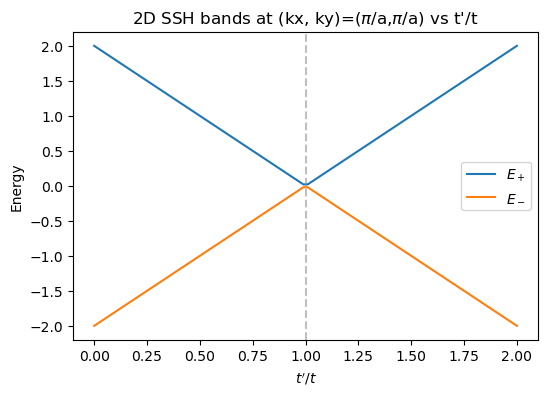

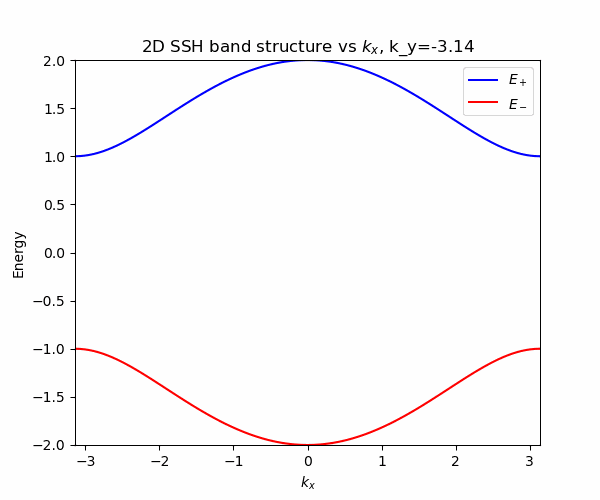

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

#2D SSH Hamiltonian:
def h_2DSSH(kx, ky, tx=1.0, tpx=0.5, ty=1.0, tpy=0.5):
    """Off-diagonal term h(k)"""
    return (tx + tpx * np.exp(-1j * kx)) + (ty + tpy * np.exp(-1j * ky))

def eigenvalues_2DSSH(kx, ky, tx=1.0, tpx=0.5, ty=1.0, tpy=0.5):
    """Compute eigenvalues of the 2D SSH Hamiltonian"""
    h = h_2DSSH(kx, ky, tx, tpx, ty, tpy)
    return np.abs(h), -np.abs(h)

#Plot E+ and E- vs t'/t at (kx, ky) = (0,0):
kx, ky = np.pi, np.pi
Nk = 100
t_ratios = np.linspace(0.0, 2.0, Nk)

E_plus = []
E_minus = []

tx, ty = 1.0, 1.0
for t_ratio in t_ratios:
    tpx, tpy = t_ratio * tx, t_ratio * ty
    E_p, E_m = eigenvalues_2DSSH(kx, ky, tx, tpx, ty, tpy)
    E_plus.append(E_p)
    E_minus.append(E_m)

# Plot bands
plt.figure(figsize=(6,4))
plt.plot(t_ratios, E_plus, label='$E_+$')
plt.plot(t_ratios, E_minus, label='$E_-$')
plt.axvline(1.0, color='gray', linestyle='--', alpha=0.5)  # topological transition
plt.xlabel("$t'/t$")
plt.ylabel("Energy")
plt.title("2D SSH bands at (kx, ky)=($\pi$/a,$\pi$/a) vs t'/t")
plt.legend()
plt.show()

#Animate band structure along k_x for varying k_y:
Nkx = 100
kx_vals = np.linspace(-np.pi, np.pi, Nkx)
ky_vals = np.linspace(-np.pi, np.pi, 50)  # frames in animation

# Set up figure
fig, ax = plt.subplots(figsize=(6,5))
line1, = ax.plot([], [], label='$E_+$', color='blue')
line2, = ax.plot([], [], label='$E_-$', color='red')
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.max(E_plus), np.max(E_plus))
ax.set_xlabel('$k_x$')
ax.set_ylabel('Energy')
ax.set_title("2D SSH band structure vs $k_x$ (animated over $k_y$)")
ax.legend()

# Update function for animation
def update(frame):
    ky_frame = ky_vals[frame]
    E_plus_frame = []
    E_minus_frame = []
    tpx, tpy = 0.5, 0.5  # fixed hopping for animation
    for kx in kx_vals:
        E_p, E_m = eigenvalues_2DSSH(kx, ky_frame, tx, tpx, ty, tpy)
        E_plus_frame.append(E_p)
        E_minus_frame.append(E_m)
    line1.set_data(kx_vals, E_plus_frame)
    line2.set_data(kx_vals, E_minus_frame)
    ax.set_title(f"2D SSH band structure vs $k_x$, k_y={ky_frame:.2f}")
    return line1, line2

# Create animation
ani = FuncAnimation(fig, update, frames=len(ky_vals), blit=True)
ani.save('2D_SSH_kx_vs_ky.gif', writer=PillowWriter(fps=8))
plt.close(fig)

# Display inline
Image(filename='2D_SSH_kx_vs_ky.gif')
#band structure should close at t'/t=1


# 3D SSH Model

The 3D SSH model is a generalization of the Su-Schrieffer-Heeger chain to three dimensions.
It consists of a cubic lattice with **alternating hoppings along x, y, z directions**.

### Hamiltonian

A minimal two-band model can be written as:

$$
H(\mathbf{k}) =
t_x \cos k_x \, \sigma_x + t_y \cos k_y \, \sigma_y + t_z \cos k_z \, \sigma_z
$$

- $t_{x,y,z}$ are hopping parameters (intra- vs inter-cell).  
- $\sigma_i$ are Pauli matrices for sublattice degrees of freedom.  

### Topology

- The 3D SSH model exhibits **3D winding numbers**, analogous to the 1D winding number.  
- Gap closings occur when $t_i = t_i'$ along any direction, leading to **topological phase transitions**.  

### Observables

- Bulk band structure: $E(\mathbf{k}) = \pm \sqrt{(t_x \cos k_x)^2 + (t_y \cos k_y)^2 + (t_z \cos k_z)^2}$  
- Surface states: Zero-energy modes appear on surfaces along topologically nontrivial directions.
- Winding number:


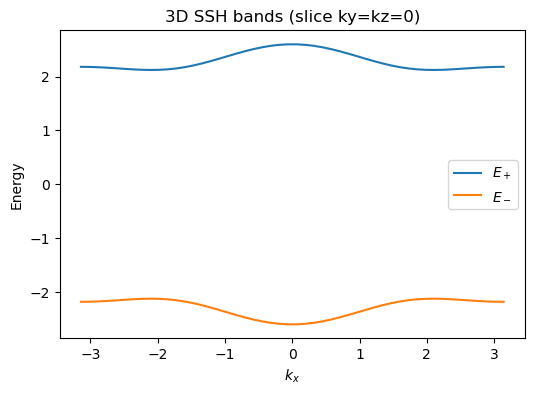

In [94]:

# Define Hamiltonian H(k) for 3D SSH
def H_3DSSH(kx, ky, kz, t_x=1.0, t_y=1.0, t_z=1.0, tpx=0.5, tpy=0.5, tpz=0.5):
    """
    Two-band 3D SSH Hamiltonian.
    kx, ky, kz: crystal momenta
    t_i: intra-cell hopping
    tpi: inter-cell hopping
    """
    H = np.array([[t_x*np.cos(kx)+tpx, t_y*np.cos(ky)+tpy - 1j*(t_z*np.cos(kz)+tpz)],[t_y*np.cos(ky)+tpy + 1j*(t_z*np.cos(kz)+tpz), -(t_x*np.cos(kx)+tpx)]])
    return H

# Compute bulk bands on 3D grid
Nk = 50
kx_vals = np.linspace(-np.pi, np.pi, Nk)
ky_vals = np.linspace(-np.pi, np.pi, Nk)
kz_vals = np.linspace(-np.pi, np.pi, Nk)

# Example: slice at ky=kz=0
E_plus = []
E_minus = []
for kx in kx_vals:
    Hk = H_3DSSH(kx, 0, 0)
    eigs = np.linalg.eigvalsh(Hk)
    E_minus.append(eigs[0])
    E_plus.append(eigs[1])

plt.figure(figsize=(6,4))
plt.plot(kx_vals, E_plus, label='$E_+$')
plt.plot(kx_vals, E_minus, label='$E_-$')
plt.xlabel('$k_x$'); plt.ylabel('Energy')
plt.title('3D SSH bands (slice ky=kz=0)')
plt.legend()
plt.show()


# currently just a placeholder - extend this to loop over ky, kz and compute a 3D winding number using the flattened Hamiltonian and numerical derivatives when time
# In practice, compute 3D winding number via integral over Brillouin zone



# Weyl Semimetals

Weyl semimetals are 3D topological metals characterized by **linear band crossings (Weyl points)** in momentum space.

### Minimal Hamiltonian

A simple two-band model:

$
H(\mathbf{k}) = v (\sigma_x k_x + \sigma_y k_y) + (m - b k_z^2) \sigma_z
$

- $v$ is the Fermi velocity, $m,b$ control the location of Weyl nodes.  
- Weyl points appear when the gap closes: $m - b k_z^2 = 0$ → $k_z = \pm \sqrt{m/b}$.  

### Topology

- Each Weyl point acts as a **monopole of Berry curvature**, with **chirality ±1**.  
- Fermi arcs appear as surface states connecting Weyl nodes of opposite chirality.

### Observables

- Bulk bands: $E(\mathbf{k}) = \pm \sqrt{v^2 (k_x^2 + k_y^2) + (m - b k_z^2)^2}$  
- Surface Fermi arcs: Gapless states on a 2D surface connecting Weyl nodes in the surface BZ.


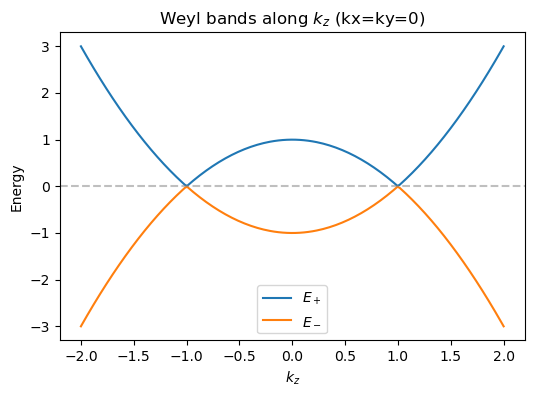

Weyl nodes at kz indices: []


In [95]:

# Minimal Weyl Hamiltonian
def H_Weyl(kx, ky, kz, v=1.0, m=1.0, b=1.0):
    """
    Two-band Weyl Hamiltonian.
    H = v*(σx kx + σy ky) + (m - b kz^2)*σz
    """
    sigma_x = np.array([[0,1],[1,0]])
    sigma_y = np.array([[0,-1j],[1j,0]])
    sigma_z = np.array([[1,0],[0,-1]])
    H = v*(kx*sigma_x + ky*sigma_y) + (m - b*kz**2)*sigma_z
    return H


#Compute bands along k_z:
kz_vals = np.linspace(-2, 2, 200)
E_plus = []
E_minus = []

for kz in kz_vals:
    Hk = H_Weyl(0, 0, kz)
    eigs = np.linalg.eigvalsh(Hk)
    E_minus.append(eigs[0])
    E_plus.append(eigs[1])

plt.figure(figsize=(6,4))
plt.plot(kz_vals, E_plus, label='$E_+$')
plt.plot(kz_vals, E_minus, label='$E_-$')
plt.xlabel('$k_z$'); plt.ylabel('Energy')
plt.title('Weyl bands along $k_z$ (kx=ky=0)')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Topological invariant placeholder
# Weyl points occur where gap closes (E_plus = E_minus = 0)
gap_indices = np.where(np.abs(E_plus + E_minus) < 1e-6)[0]
print("Weyl nodes at kz indices:", gap_indices)
